In [1]:
## Preamble: Package Loading
import numpy as np
import ipywidgets as ipw
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import itertools as iter
import os
import json
# Preamble working directory retreival
wkng_folder = os.getcwd()

<h1> Parametric Panel, Selection, and Control </h1>
<h3> Proposal Supplement </h3>
By: Eric Penner

<h2> 1 Model Setup </h2>

<h3> 1.1 Base Model </h3>

For each time period $t \in \{1,2, \ldots, T\}$, component $ d\in \{1,2, \ldots , p_1\}$ of $Z_{1jt}$, and cross-section $j \in \{1,2,\ldots, q\}$ where $\{q,T\} \in \mathbb{N}$ consider the following,

\begin{align} 
Y_{jt} &= \beta_0 + [\; Z_{1jt}' \;\; Z_{2jt}' \;] \beta_1 + e_j + \varepsilon_{jt} \\[1em]
%
Z_{1jt,d} &= \alpha_{0jd} + Z_{2jt}' \alpha_{1jd} + W_{jt}' \alpha_{2jd} + V_{jt,d} \tag{2d} \\[1em]
%
E(&\varepsilon_{jt} | Z_{1jt} , Z_{2jt}) = E(\varepsilon_{jt} | Z_{1jt}) \neq 0  \\[1em]
%
E(& V_{jdt} | Z_{1j(t-1)},\ldots,Z_{1j(t-c)},Z_{2jt},W_{jt}) = 0 
%
\end{align}


Where for $\{p_1,p_2,c,w,w_1,w_2, \ldots ,w_q \} \subset \mathbb{N}$, 

* $Y_{jt}$, and $\varepsilon_{jt}$ are scalar random variables, 

* $Z_{2jt}$ is a $p_2$ dimesion vector of exogenous random variables, 

* $Z_{1jt}$  is a vector of endogenous random variables having dimension $p_1$. 

* $e_j$ is a scalar fixed effect, 

* $\varepsilon_{jt}$ is a scalar error term, 

* $V_{jt,d}$ is a scalar error term. 

* $W_t = [ \; W_{1t} \;\; W_{2t} \;\; \cdots \;\; W_{wt} \;]'$ is vector of instrumental variables of dimension $w$, 

* $W_{jt} = [\;W_{jt,1} \;\; W_{jt,2} \;\; \cdots \;\; W_{jt,w_j} \;]'$ is a vector of instrumental variables of dimension $w_j$ where $\{W_{jt,l}\}_{l=1}^{w_j} \subset \{W_{t,l}\}_{l=1}^{w}$ and there exists at least one pair $j,j'  \in \{1,2, \ldots , p\}$, where $j \neq j'$, such that $\{W_{jt,l}\}_{l=1}^{w_j} \neq \{W_{j't,l}\}_{l=1}^{w_{j'}}$.

* $\beta_0$ and $\alpha_{0jd}$  are scalars, 

* $\beta_1$, $\alpha_{1d}$, $\alpha_{2d}$, are $p_1 +p_2 = p$, $p_2$, and $w_j$ dimensional vectors of real numbers respectively. 

* Lastly for notational convenience let define the following equivalences, 
\begin{align*} 
Z_{jt} = [\; Z_{1jt}' \;\; Z_{2jt}' \;]'  \;\;\; \text{ and } \;\;\; V_{jt} = [ \; V_{jt,1} \; V_{jt,2} \; \cdots \;V_{jt,p_1}\;]'
\end{align*}

<h3> 1.2 Differenced Model with Control Functions </h3>

As shown in the the main proposal I treat the presence of endogeneity with the control function approach and then first difference the primary equation to eliminate fixed effects, resulting in the following. 

\begin{align} 
\Delta Y_{jt} &= \Delta Z_{jt}'\beta_1 + \sum_{d=1}^{p_1} \Delta f_{jd}(V_{jt,d}) + \Delta u_{jt} \\[1em]
%
Z_{1jt,d} &= \alpha_{0jd} + Z_{2jt}' \alpha_{1jd} + W_{jt}' \alpha_{2jd} + V_{jt,d} \tag{2d}\\[1em]
E(&\Delta u_{jt} | \{Z_{j_k},W_{jk},X_{jk},V_{jk} \}_{k=1}^t) = 0 \\[1em]
%
E(& V_{jt} | Z_{1jt-1},\ldots,Z_{1jt-c_1},Z_{2jt},W_{jt}) = 0 
%
\end{align}

<h3>  1.3 Identification of $\beta_1$ </h3>

I use a variation on the identification procedure in Manzan and Zerom to identify $\beta_1$, this required the construction of the following density ratios, functions, and vectors.

Density Ratio  
\begin{align*} 
\phi_{jt} = \frac{ \prod_{d=1}^{p_1}p(V_{jt,d},V_{jc,d}) }{p(V_{jt},V_{jc})} 
\end{align*}

Conditional Expectations 

\begin{align*} 
H_{jd}(\Delta Z_{jt}) &= E[\phi_{jt} \Delta Z_{jt} |V_{jt,d},V_{jc,d}] \hspace{1.25cm} 
%
H_{jd}(\Delta Y_{jt}) = E[\phi_{jt} \Delta Y_{jt} |V_{jt,d},V_{jc,d}] \\
%
H_j(\Delta Z_{jt}) &= \sum_{d=1}^{p_1} H_{jd}(\Delta Z_{jt})  \hspace{2.5cm}
%
H_j(\Delta Y_{jt}) = \sum_{d=1}^{p_1} H_{jd}(\Delta Y_{jt})  \end{align*} 

Vectors

\begin{align*}
H(\Delta Y_t)  &= [ \; H_1(\Delta Y_{1t}) \;\; H_2(\Delta Y_{2t}) \;\; \cdots \;\; H_q(\Delta Y_{qt}) \; ]' \\[1em]
H(\Delta Z_t)  &= [ \; H_1(\Delta Z_{1t}) \;\; H_2(\Delta Z_{2t}) \;\; \cdots \;\; H_q(\Delta Z_{qt}) \; ]' \\[1em]
%
\Delta Y_t &= [ \; \Delta Y_{1t} \;\;  \Delta Y_{2t} \;\; \cdots \;\; \Delta Y_{qt} \;] '  \\[1em]
%
\Delta Z_t &= [ \; \Delta Z_{1t} \;\;  \Delta Z_{2t} \;\; \cdots \;\; \Delta Z_{qt} \;] ' 
\\[1em] 
\Delta u_t &=  [ \; \Delta u_{1t} \;\;  \Delta u_{2t} \;\; \cdots \;\; \Delta u_{qt} \;] ' 
\end{align*}

<h4> 1.3.1 Lemma 1 </h4>

Letting $\phi_{t} = diag\big( \{\phi_{jt}\;\}_{j=1}^q \big)$, if for all $t\in \{2, \ldots , T\}$

1. $E\big[ f_{jd}(V_{jdt})\big] = E\big[ f_{jd}(V_{jdc}) \big] 
$ for all $d\in \{1,2, \ldots , p_1\}$, $j\in \{1,2, \cdots , q\}$, and 

2. $E \Big( [\Delta Z_t - H(\Delta Z_t)]' [\Delta Z_t - H(\Delta Z_t)] \Big)$ is positive semi definite,

Then $\beta_1$ is identified, in particular,

\begin{align*} 
\beta_1 = E \Big( [\Delta Z_t - H(\Delta Z_t)]' \phi_{t} [\Delta Z_t - H(\Delta Z_t)] \Big)^{-1}E \Big( [\Delta Z_t - H(\Delta Z_t)]' \phi_{t} [\Delta Y_t - H(\Delta Y_t)] \Big)
\end{align*} 

<h2> 2.0 Post Secondary Equation Estimation </h2>

Here we will discuss the estimation of $\beta_1$ assuming that estimates $\hat{V}_{jt,d}$ have already been generated by some as yet unspecified procedure. Estimation of the secondary equation will be discussed in the following sections

<h3> 2.1  Density Estimation </h3>

The following function(s) implement a rosenblatt kernel estimator where 

$$ \hat{p}(\hat{V}_{dt,l},\hat{V}_{d(t-1),l}) 
= (nh_1h_2)^{-1}\sum_{ i = 2 }^T k_1[h_1^{-1}(\hat{V}_{di,l} -\hat{V}_{dt,l})]k_2[h_2^{-1}(\hat{V}_{di,l} -\hat{V}_{d(t-1),l})]  
$$ 

<h4>  2.1.1 Density Estimation: Function to Calculate Kernel Values </h4>

In [2]:
def mvkernel(x,kernel):  
    """ 
PURPOSE: Calculate product kernel values at points x
    
INPUTS
x       points of kernel evaluation (3)x(n)x(dim of x)
kernel  Scalar value indicating which kernel to use where
           1 = Rectangular
           2 = Triangular
           3 = Biweight
           4 = Silverman's 
           5 = Epanechnikov order 2
           6 = Epanechnikov order 2 alt
           7 = Epanechnikov order 4
           8 = Epanechnikov order 6
           9 = Gaussian order 2
           10 = Gaussian order 4
           11 = Gaussian order 6

OUTPUTS
ker     product of kernel values along axis = 0
    """
    
    if kernel == 1:
        # Rectangular Kernel  
        ker = 1/2*(np.absolute(x)<1)
    elif kernel == 2:
        # Triangular Kernel
        ker = (1-np.absolute(x))*(np.absolute(x)<1)
    elif kernel == 3:
        # Biweight Kernel
        ker = (15/16*(1-x**2)**2)*(np.absolute(x)< 1)
    elif kernel == 4:
        # Silvermans Kernel 
        ker = 0.5*np.exp(-np.absolute(x)/np.sqrt(2))*np.sin(np.absolute(x)/np.sqrt(2) + np.pi/4)   
    elif kernel == 5:
        # Epanechnikov order 2
        ker = 0.75*(1-x**2)*(np.absolute(x)<=1)
    elif kernel == 6:
        # Epanechnikov order 2 (alt)?
        ker = (0.75/np.sqrt(5))*(1-0.2*x**2)*(np.absolute(x)<=np.sqrt(5))
    elif kernel == 7:
        # Epanechnikov order 4
        ker  = (0.75/np.sqrt(5))*(15/8-7/8*x**2)*(1-0.2*x**2)*(np.absolute(x)<=np.sqrt(5))
    elif kernel == 8:
        # Epanechnikov order 6
        ker  = ((0.75/np.sqrt(5))*(175/64-105/32*x**2+ 231/320*x**4)
                                 *(1-0.2*x**2)*(np.absolute(x)<=np.sqrt(5)))
    elif kernel == 9:
        # Gaussian order 2
        ker  = (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
    elif kernel == 10:
        # Gaussian order 4
        ker  = (3/2 -1/2*x**2)*(1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
    elif kernel == 11:
        # Gaussian order 6
        ker  = (15/8-5/4*x**2+1/8*x**4)*(1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
    else:
        print('Incorrect Kernel Number')

    if x.ndim > 2:
        # Value of each product kernel
        ker = np.prod(ker,axis = 0)

    return ker

<h4> 2.1.2 Density Estimation:  Function to Calculate Estimated Density</h4>

In [3]:
def mvden(x,p,h,kernel): 
    """
Purpose: Multivariate Rosenblatt Kernel Density Estimator at points p based on sample x    
    
INPUTS
x       np.array of data having order (number of observations)x(dimension of X)
P       np.array of points of evaluation having order (number of points)x(dimension of X)
h       Bandwidth vector of order (1)x(dimension of X)
kernel  Scalar value indicating which kernel to use where
           1 = Rectangular
           2 = Triangular
           3 = Biweight
           4 = Silverman's 
           5 = Epanechnikov order 2
           6 = Epanechnikov order 2 alt
           7 = Epanechnikov order 4
           8 = Epanechnikov order 6
           9 = Gaussian order 2
           10 = Gaussian order 4
           11 = Gaussian order 6

OUTPUTS
den      Density at each point of evaluation (number of observation)x1
    """
    
    x = np.array(x)
    p = np.array(p)
    h = np.array(h)
    
    if x.ndim == 1:
            m0 = (x.reshape(1,x.shape[0])-p.reshape(p.shape[0],1))/h
    elif x.ndim == 2:
        m0 = np.zeros((x.shape[1],p.shape[0],x.shape[0])) 
        for i in range(0,x.shape[1]):
            m0[i,:,:] = (x[:,i].reshape(1,x.shape[0])-p[:,i].reshape(p.shape[0],1))/h[i]

    ker = mvkernel(m0,kernel)/(x.shape[0]*np.prod(h))
    den = np.dot(ker,np.ones(x.shape[0]))

    return den

<h4> 2.1.3  Density Estimator Demonstration: Setup </h4>

In order to validate the density function code in a setting similar to ours I will perform the following,

$$ \hat{p}(X_{t},X_{(t-1)}) 
= [(T-1)h_1h_2]^{-1}\sum_{l=2}^Tk_1[h_1^{-1}(X_{l} -X_{t})]k_2[h_2^{-1}(X_{l} - X_{(t-1)})]  \;\; \text{ where } \;\; X_t \sim N(0,1)
$$ 


<h4> 2.1.4  Density Estimator Demonstration: Data Generation </h4>

In [4]:
# Number of data points
n = 100
mu = np.array([0])
var = np.array([1])
x = np.random.normal(mu,var,n).reshape(n,1)
x = pd.DataFrame(x,columns = ['x1'])
x['Bx1'] = x.x1.shift(1)
x = x[1:]
## Points of Evaluation Generation and Stacking
npts = 20
# Smallest coordinate value
pl = -2
# Largest coordinate value
pu =  2
p = np.linspace(pl,pu,npts).reshape((20,1))
p = np.hstack((p,pl*np.ones((20,1))))
for j in np.arange(1,20,1): 
    pt = np.hstack((p[0:20,0].reshape((20,1)),p[j,0]*np.ones((20,1))))
    p = np.vstack((p,pt))
p = pd.DataFrame(p, columns =['p1','p2'])

# Standard Normal pdf
fnrm = lambda x: np.exp(-x**2/2)/np.sqrt(2*np.pi)

<h4> 2.1.3  Density Estimator Demonstration: Plotting Function </h4>

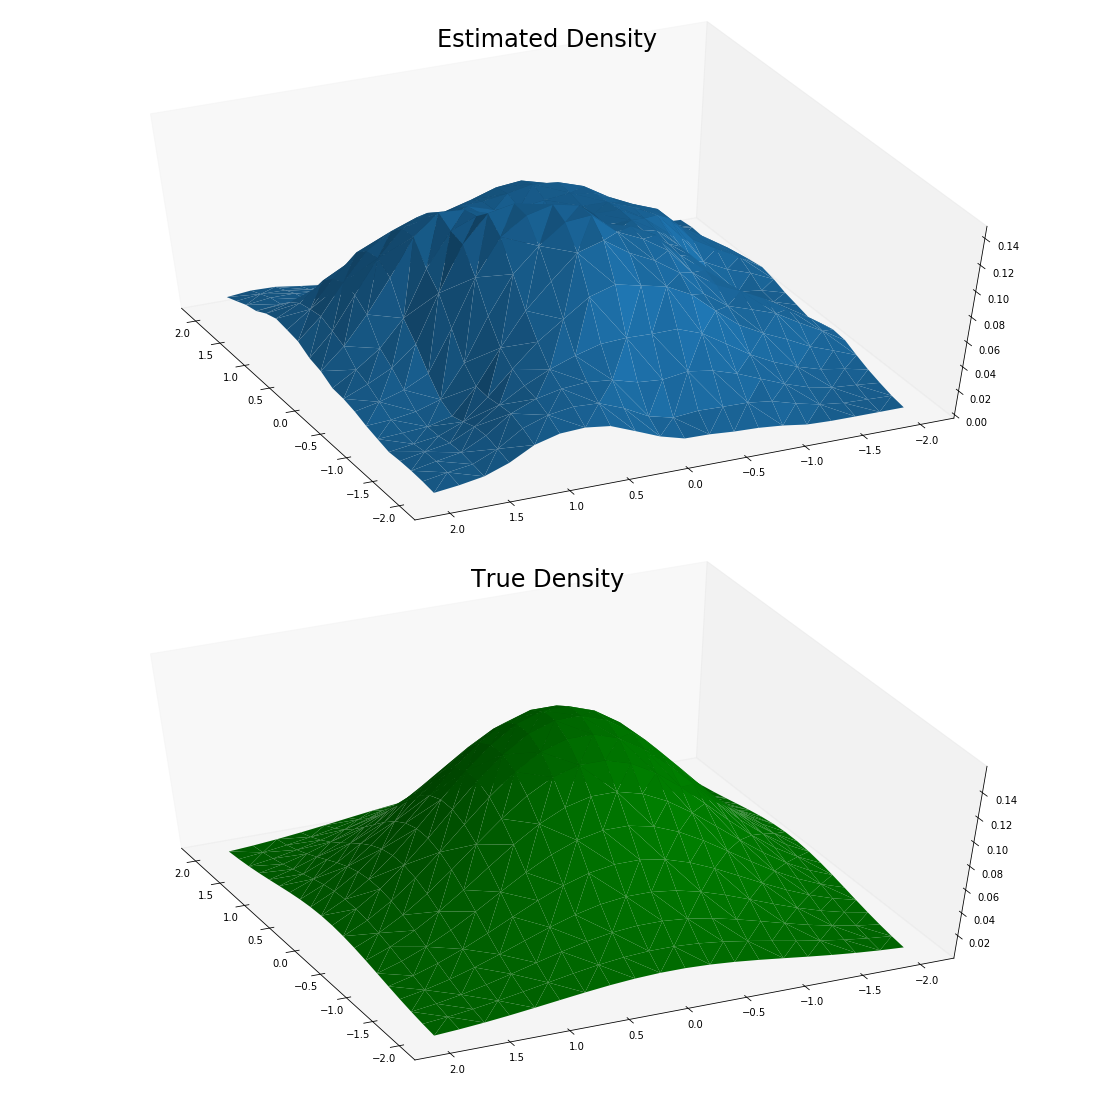

In [5]:
# Plug in Bandwidths
h = 0.8*x.shape[0]**(-1/5)*x.std(0)
# Collection into an array
h = np.array([h , h])
# Density estimation functions call
p['xden'] = mvden(np.array(x),np.array(p),h[0],6)

plt.close('all')
# Plotting
fig, ax = plt.subplots(2,1,subplot_kw = {'projection':'3d'})
fig.set_figheight(15)
fig.set_figwidth(15)
#fig.suptitle("Density",fontsize = 20)
fig.tight_layout( pad = 0, h_pad = 0 , w_pad = 0)
ax[0].plot_trisurf(p.p1,p.p2,p.xden,alpha = 1)
ax[0].set_title('Estimated Density', fontsize = 24)
ax[0].grid(b=None)
ax[1].plot_trisurf(p.p1,p.p2,fnrm(p.p1)*fnrm(p.p2),alpha = 1, color = 'g')
ax[1].set_title('True Density',fontsize = 24)
ax[1].grid(b=None)
el = 50
az = 155
ax[0].view_init(elev=el, azim=az)
ax[1].view_init(elev=el, azim=az)
plt.show()

<h3> 2.2 Density Ratio Construction </h3> 

I will construct the following ratios directly within the main function code presented below

\begin{align*} 
\hat{\phi}_{jt} = \frac{ \prod_{d=1}^{p_1}\hat{p}(\hat{V}_{jt,d},\hat{V}_{j(t-1),d}) }{\hat{p}(\hat{V}_{jt},\hat{V}_{j(t-1)})}
%
\hspace{1cm}
%
\hat{\theta}_{jt,d} = \frac{ \prod_{l \neq d}^{p_1}\hat{p}(\hat{V}_{jt,l},\hat{V}_{j(t-1),l}) }{\hat{p}(\hat{V}_{jt},\hat{V}_{j(t-1)})}
\end{align*}

<h3> 2.3 H Function Estimation:</h3>

The following function implement a nadaraya watson estimator of the H functions 
$$ \hat{H}_{j,d}(\Delta Z_{jt,a}) = [(T-1)b_1b_2]^{-1} \sum_{l \neq t , l > 1}^T k_1[b_1^{-1}(V_{jl,d} - V_{jt,d})] k_2[b_2^{-1}(V_{j(l-1),d} - V_{j(t-1),d})] \hat{\theta}_{jl,d} \Delta Z_{jl,a} $$

<h4> 2.3.1 H Function Estimation: Function Code </h4>

In [6]:
def Nw_H_pan(regrsnd,theta,regressr,p,h,kernel,l10 = 1):
    """
INPUTS 
regrsnd    Regressand of the regression (Delta Y or Delta Z) (# of obs - 1) x 1
theta      Density ratio which will multiply regressand (# of obs - 1) x 1
regressr   Vector of conditioning variables (V_{j,d}) (# of obs ) x 1
p          points of evaluation (npoints x 2) 
b          Vector of Bandwidths [b1, b2] 
l10        Leave one out indicator; 1 leave one out, 0 dont

OUTPUTS
H       Vector of H function estimates corresponding to arguments p
    """
    # Converting regressr input into np.array
    reg = np.array(regressr)
    # Setting up full regressor array where for a = 1,2,...,T-1, where 
    #           reg[a,:] =  [ V_{j(a+1),d} ,  V_{j(a),d} ]
    reg = np.vstack((reg[:-1],reg[1:])).T
    # Converting regrsnd input to np.array
    y = np.array(regrsnd)
    # Converting theta input to np.array
    tht = np.array(theta)
    # Points of evaluation
    p = np.array(p)
    # Converting bandwidth input to np.array
    b = np.array(h)
    # Product of regressands and theta ratios
    y_tht = y*tht

    # Construction of each kernel argument array by broadcasting
    m1 = (reg[:,0].reshape(1,reg.shape[0])-p[:,0].reshape(p.shape[0],1))/b[0]
    m2 = (reg[:,1].reshape(1,reg.shape[0])-p[:,1].reshape(p.shape[0],1))/b[1]
    # Initializing the kernel argument array 
    m0 = np.zeros((2,p.shape[0],reg.shape[0]))
    # Placing broadcasted arrays in m0
    m0[0,:,:] = m1
    m0[1,:,:] = m2

    # Calculating kernel values
    ker = mvkernel(m0,kernel)

    # Matrix of theta ratios so that observations match the first argument of kernels in H1
    H0 = np.tile(y_tht,(p.shape[0],1))
    # Multiply these two together
    H1 = ker*H0;
    # Deleting the diagonal which converts to a leave one out style
    if l10 == 1:
        H2 = H1 - H1*np.eye(H1.shape[0]);
    else: 
        H2 = H1
    # Finishing the calculation at each point in X
    H = 1./((reg.shape[0]-1)*b[0]*b[1])*np.dot(H2,np.ones((H2.shape[1],1)))
    return H

<h4>  2.3.2  H Function Estimation Demonstration: Setup </h4>

Here we generate data as follows

$$
Y_t = f_1(a_1,b_1,X_{t-1}) + f_2(a_2,b_2,X_{t}) + \varepsilon_t \;\;\; \text{ where } \;\;\; X_t,\varepsilon \sim N(0,1) 
$$

where $f_1$ and $f_2$ are defined in the following code. Its difficult to validate the function code with an example exactly like the dgp we are interested in so instead I demonstrate the following estimation. 

$$
\hat{E}[Y_t|X_t,X_{t-1}] = [(T-1)b_1b_2]^{-1} \sum_{l \neq t , l > 1}^T k_1[b_1^{-1}(X_{l} - X_{t})] k_2[b_2^{-1}(X_{(l-1)} - X_{(t-1)})] \hat{\theta}_{l} Y_l \;\;\; \text{ where } \;\;\; \hat{\theta}_{l} = \frac{1}{\hat{p}(X_{l},X_{(l-1)})}
$$

<h4> 2.3.3  H Function Estimation Demonstration: Data Generation </h4>

In [7]:
## Regression Function Definition
f1 = lambda a,b,x : a*np.cos(b*x)
f2 = lambda a,b,x : a*np.sin(b*x)
#f1 = lambda a,b,x: a*x**b
#f2 = lambda a,b,x: a*x**(b)

## Regressor and Error Generation
# Number of observations
n = 250
# Vector of means
mu = np.array([0,0])
# Variance Covariance Matrix
var = np.array([[1,0],[0,1]])
# Data generation
x = np.random.multivariate_normal(mu,var,n)
# Coverting to pandas dataframe
x = pd.DataFrame(x,columns = ['x1','ep'])

## Regressand Generation
# Parameters for conditional expectation functions
a = [ 3 , 1 ]
b = [ 2 , 3 ] 
# Conditional expectation functions at data points
x2 = pd.DataFrame(f1(a[0],b[0],np.array(x.x1[:-1]))
                  +f2(a[1],b[1],np.array(x.x1[1:])),
                  columns = ['m'])
# Regressand Generation
x2['y'] = x2.m + np.array(x.ep[1:])

## Points of Evaluation Generation
# Smallest coordinate value
pl = -2
# Largest coordinate value
pu =  2
# Grid of points will be npts X npts
npts = 20
# Points generation and Stacking
p = np.linspace(pl,pu,npts).reshape((20,1))
p = np.hstack((p,pl*np.ones((20,1))))
for j in np.arange(1,20,1): 
    pt = np.hstack((p[0:20,0].reshape((20,1)),p[j,0]*np.ones((20,1))))
    p = np.vstack((p,pt))
p = pd.DataFrame(p, columns =['p1','p2'])

## Constructing the Theta Ratio: 1/p(x_1t,x_1(t-1))
z = pd.DataFrame(np.array(x.x1[:-1]), columns = ['xt'])
z['xt-1'] = np.array(x.x1[1:])
# Plug-in Bandwidth
h0 = 1.45*z.shape[0]**(-1/5)*z.xt.std(0)
# Collecting into a vector
h = [ h0 , h0 ]
# Density Estimate Function Call
den = mvden(z,z,h,10)
# Theta Ratio
tht1 = 1/den

<h4> 2.3.4  H Function Estimation Demonstration: Plotting Function </h4>

In [8]:
def Nw_H_plot(c_h,x2,tht1,x,p,ker,el,az):
    plt.close('all')
    h0 = c_h*x.x1.shape[0]**(-1/5)*x.x1.std(0)
    # Collecting into a vector
    h = [ h0 , h0 ]
    ## Function Call
    H = Nw_H_pan(x2['y'],tht1,x.x1,p,h,ker,0)
    # Plotting
    fig, ax = plt.subplots(2,1,subplot_kw = {'projection':'3d'})
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax[0].plot_trisurf(p.p1,p.p2,H[:,0])
    ax[0].set_title('Estimated Function')
    ax[1].plot_trisurf(p.p1,p.p2,f1(a[0],b[0],p.p1)+f2(a[1],b[1],p.p2),color = 'g')
    ax[1].set_title('True Function')
    ax[0].view_init(elev=el, azim=az)
    ax[1].view_init(elev=el, azim=az)
    plt.show()

<h4> 2.3.5 H Function Estimator Demonstration: Interactive Widgets Setup </h4>

In [9]:
box_hlayout = box_layout = ipw.Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='90%')

box_vlayout = ipw.Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width='10%',
                    height = 'auto',
                    justify_content='space-between')

s_az = ipw.IntSlider(min = 0 , max = 360, value = 45, step = 15, description = 'Azimuth',width = 'auto'
              ,layout = box_hlayout, style = {'description_width': 'initial'} )
s_c = ipw.FloatSlider(min = 0.1 , max = 4, value = 2.5, step =0.2, description = 'Bandwidth Constant',width = 'auto'
              ,layout = box_hlayout, style = {'description_width': 'initial'})
s_ker = ipw.IntSlider(min = 1 , max = 11, value = 6, description = 'Kernel',width = 'auto'
              ,layout = box_hlayout, style = {'description_width': 'initial'})
s_el = ipw.IntSlider(min = -90 , max = 90, value = 30, step = 15, description = 'Elevation',orientation = 'vertical'
                  ,length = 'auto',layout = box_vlayout,  style = {'description_length': 'initial'} )

out = ipw.interactive_output(Nw_H_plot,{'c_h':s_c,'x2': ipw.fixed(x2),'tht1': ipw.fixed(tht1) 
                                , 'x': ipw.fixed(x),'p': ipw.fixed(p),'ker': s_ker ,'az':s_az ,'el': s_el})
ipw.VBox([ipw.HBox([out,s_el])   
          ,ipw.VBox([s_az,s_c,s_ker])])

<h2> 3 Secondary Equation Estimation </h2>

The specification of equation (2d) is quite general where; intercepts $\alpha_{0jd}$, and coefficients on exogenous regressors $\alpha_{1jd}$ are unique to each cross-section. Furthermore, although instruments $W_{jt}$ are shared across cross-sections their coefficients $\alpha_{2jd}$ are unique, and as yet there is no sense in which error terms $V_{jdt}$ are correlated across cross-section. As a result there are a number of restrictions on the regressors and parameters of equation (2d) which can be imposed and have a substantial effect on the manner in which $V_{jdt}$ will be estimated. 

** Note: **  For all vectors of dimension greater than two, I reference the individual elements of each vector by including a comma followed by a scalar value in the subscript. I reference the entire vector whenever the comma is omitted. For example,

\begin{align*} 
W_{jt} = \begin{bmatrix} W_{jt,1} & W_{jt,2} & \cdots & W_{jt,w_j} \end{bmatrix}'
\end{align*}

<h3> 3.1: Case 1 </h3> 

* Cross-sectional data is not panel, meaning that in this case there is no assumption restricting crossections to have common coefficients in the secondary equations.

* $W_{jt}$ is an **known** subset of $W_{t}$.

If so, estimation is comprised of q separate OLS regressions.
\begin{align*} 
(\hat{\alpha}_{0jd}, \hat{\alpha}_{1jd},\hat{\alpha}_{2jd}) 
 = \arg \min \sum_{t=1}^T\left(Z_{1jdt} - \alpha_{0} -  Z_{2jt}'\alpha_{1} - W_{jt}'\alpha_{2} \right)^2
\end{align*}
where $\alpha_0 \in \mathbb{R}$, $\alpha_{1} \in \mathbb{R}^{p_2}$, and $\alpha_{2} \in \mathbb{R}^{w_j}$. So that 
$$\hat{V}_{jdt} = Z_{1jdt} - \hat{\alpha}_{0jd} - Z_{2jt}'\hat{\alpha}_{1jd} - W_{jt}'\hat{\alpha}_{2jd}$$

<h4> 3.1.1: Case 1 Estimation </h4>

Given that the data is not panel q seperate ols regressions will be coded directly in the main function code below

<h3> 3.2 Case 2: </h3>

* Cross-sectional data is not panel, meaning that in this case there is no assumption restricting crossections to have common coefficients in the secondary equations.

* $W_{jt}$ is an ** unknown ** subset of $W_{t}$.

If so, estimation is comprised of $q$ separate regressions, each of which will incorporate a subset selection routine. Let $\alpha_{2jd} =  [\;\alpha_{2jd,1} \;\; \alpha_{2jd,2} \;\; \cdots \;\; \alpha_{2jd,w} \; ]$ where $\alpha_{2jd,l} = 0$ whenever $W_{t,l} \notin W_{jt}$. To facilitate subset selection I apply the lasso estimator by imposing an $\ell^1$ penalty on estimated coefficients $\hat{\alpha}_{2jd}$ .

\begin{align*} 
(\hat{\alpha}_{0jd}, \hat{\alpha}_{1jd},\hat{\alpha}_{2jd})  = \arg \min \sum_{t=1}^T\left(Z_{1jdt} - \alpha_{0} -  Z_{2jt}'\alpha_{1} - W_{t}'\alpha_{2} \right)^2 \;\; \text{ subject to } \;\; \sum_{l = 1}^w |a_{3,l}| \leq \lambda
\end{align*}
where $\alpha_0 \in \mathbb{R}$, $\alpha_{1} \in \mathbb{R}^{p_2}$, and $\alpha_{3} \in \mathbb{R}^{w}$. So that again,
 $$\hat{V}_{jdt} = Z_{1jdt} -\hat{\alpha}_{0jd} - Z_{2jt}'\hat{\alpha}_{1jd} - W_{t}'\hat{\alpha}_{2jd}$$ 


<h4> 3.2.1: Case 2 Estimation </h4>

Given that the data is not panel q seperate ols regressions will also be estimated but here I will implement the lasso algorithm (Tibshrani (1996) JRSSB).

In [10]:
### lasso estimator goes here. 

<h3> 3.3 Case 3: </h3>

* $W_{jt}$ is an known subset of $W_{t}$,

* Cross-sectional data is panel, meaning for all $j,j' \in \{1,2, \ldots,q\}$

    1. $\alpha_{1jd} =\alpha_{1j'd} \equiv \alpha_{1d}$  

    2.  $\alpha_{2jd,l} = \alpha_{2j'd,l} \equiv \alpha_{2d,l}$ whenever $W_{t,l} \in W_{jt}$ and $W_{t,l} \in W_{j't}$ 


Let
\begin{align*}
1[W_{t,l} \in W_{tj}] = 
\begin{cases} 
1 & \text{ if } W_{t,l} \in W_{tj} \\ 
0 & \text{otherwise}
\end{cases}
\end{align*}

and $M_j = \text{diag}(\{1[ W_{t,l} \in W_{jt}] \}_{l=1}^w)$ so that,

\begin{align*}
Z_{1jdt} &= \alpha_{0jd} + Z_{2jt}' \alpha_{1jd} + W_{jt}' \alpha_{2jd} + V_{jdt} \\
& =\alpha_{0jd} + Z_{2jt}' \alpha_{1d} + W_{t}'M_j \alpha_{2d} + V_{jdt}
\end{align*}

Now let 
* $\Delta Z_{1jdt} = Z_{1jdt} - Z_{1jd(t-1)}$
* $\Delta Z_{2jdt} = Z_{2jdt} - Z_{2jd(t-1)}$ 
* $\Delta W_{t} = W_{t} - W_{t-1}$, 
* $\Delta V_{jdt} = V_{jdt} - V_{jd(t-1)}$ 

so that, 

\begin{align*} 
\Delta Z_{1jdt} =\Delta Z_{2jt}' \alpha_{1d} + \Delta W_{t}'M_j \alpha_{2d} + \Delta V_{jdt}
\end{align*}
As a result,

\begin{align*} 
(\hat{\alpha}_{1d},\hat{\alpha}_{2d})  = \arg \min \sum_{j=1}^q\sum_{t=1}^T\left( \Delta Z_{ijt} -  \Delta Z_{2jt}'\alpha_{1} - \Delta W_{t}'M_j\alpha_{2} \right)^2 
\end{align*}

So that given
\begin{align*} 
\alpha_{0jd} =  E(V_{jdt} + \alpha_{0jd}) =
E( Z_{1jdt} - Z_{2jt}'\alpha_{1d} - W_{t}'M_j\alpha_{2d}) 
\end{align*}

we have

$$\hat{V}_{jdt} = Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'M_j\hat{\alpha}_{2d} - T^{-1}\sum_{t=1}^T  (Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'M_j\hat{\alpha}_{2d}) $$
    

<h4> 3.3.1: Case 3 Estimation </h4>

This is simple fixed effect panel data estimator, I will implement is directly in the full code below. 

<h3> 3.4: Case 4 </h3>

* $W_{jt}$ is an **unknown** subset of $W_{t}$,

* Cross-sectional data is panel, meaning for all $j,j' \in \{1,2, \ldots,q\}$

    1. $\alpha_{1jd} =\alpha_{1j'd} \equiv \alpha_{1d}$  

    2. $\alpha_{2jd,l} = \alpha_{2j'd,l} \equiv \alpha_{2d,l}$ whenever $W_{t,l} \in W_{jt}$ and $W_{t,l} \in W_{j't}$ 

Inhereting notation from case 3 we again have

\begin{align*} 
\Delta Z_{1jdt} =\Delta Z_{2jt}' \alpha_{1d} + \Delta W_{t}'M_j \alpha_{2d} + \Delta V_{jdt}
\end{align*}

In order to introduce our selection procedure we will estimate the coefficients on $W_{t}$ as if that are not identical, then average the non zero estimates to construct a single estimate.  Consider, 

\begin{align*} 
(\hat{\alpha}_{1d},\hat{\alpha}_{2d})  = \arg \min \sum_{j=1}^q\sum_{t=2}^T\left( \Delta Z_{1jdt} -  \Delta Z_{2jt}'\alpha_{1} - \Delta W_{t}'\alpha_{2j} \right)^2 \;\; \text{ subject to } \;\; \sum_{l=1}^w|\alpha_{2j,l}| \leq \lambda \;\;  \text{ for all } 1 \leq j \leq q
\end{align*}

Consequently define for some $\varepsilon > 0$ 

\begin{align*} 
\tilde{\alpha}_{2d,l} = \frac{\sum_{l=1}^q \hat{\alpha}_{2jd,l} 1[ \hat{\alpha}_{2jd,l} > \varepsilon ] }{ \sum_{l=1}^q 1[ \hat{\alpha}_{2jd,l} > \varepsilon] }
\end{align*}

Now let $\tilde{\alpha}_{2d} = [ \; \tilde{\alpha}_{2d,1} \;\; \tilde{\alpha}_{2d,2} \;\; \cdots \;\; \tilde{\alpha}_{2d,w}  \; ]'$ and $\tilde{M}_{jd} = \text{diag}( \{ 1[\hat{\alpha}_{2jd,l} > \varepsilon ] \}_{l=1}^w)$ so that, 

\begin{align*}
\hat{V}_{jdt} = Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'\tilde{M}_{jd}\tilde{\alpha}_{2d} - T^{-1}\sum_{t=1}^T  (Z_{1jdt} - Z_{2jt}'\hat{\alpha}_{1d} - W_{t}'\tilde{M}_{jd}\tilde{\alpha}_{2d}) 
\end{align*}

<h4> 3.4.1: Case 4 Estimation </h4>

This is fixed effect panel data estimator with cross-section wise lasso estimation, I will implement it here.  

In [11]:
## panel estimator with lasso goes here.

<h2> 4 Monte Carlo DGP Data </h2>

The data used in the following monte carlo exercise was created by 'psc_dgp.ipynb' where is was converted to a .json format and stored in '.../pan_sel_cntrl_repo/data' folder. The following sections load and convert this .json data into a usable form. 

<h3> 4.1 Monte Carlo DGP Data: JSON Loading </h3>

In [12]:
input_filename = 'pscdata_5_23_2.json'
input_file_full = ''.join([wkng_folder,'/data/',input_filename])
with open(input_file_full) as f_obj: 
    pscdata = json.load(f_obj)

<h3> 4.2 Monte Carlo DGP Data: Extracting metadata dictionary and creating the input dictionary </h3> 

In [13]:
# Initializing the data sets metadata dictionary 
m = pscdata[0][0].copy()
# Removing uneeded data
for i in ['c_inst','err_vpro','ex_vpro','inst_vpro','r_seed','frc', 'nds']:
    del m[i]

# Indicator for  whether in this run the subset of instrument relvant to each cross section is known.
m['kwnsub'] = 0  
m['k_mvd'] = 9
m['k_uvd'] = 9
m['c_mvd'] = 1.5
m['c_uvd'] = 1.4
    
# List of list with the names of the relevant instruments for each crossection
in_nm=[]
for i in range(m['ncs']):
    # If the subset is known then the list of relevant instrument for each crs is supplied to estimator
    if m['kwnsub'] == 1:
        a=[ True if pscdata[0][1]['coeff'][0][i][k]!=0 else False 
            for k in range(m['n_exo'],m['n_exo']+m['t_inst'])]
        in_nm.append(np.array(pscdata[0][1]['Dins_nms'][1:])[a].tolist())
    # If the subset is unknow the the list of all instrument will be supplied to estimator for each crs
    else:
        in_nm.append(pscdata[0][1]['Dins_nms'][1:])

# List of names of the endogenous variables in the dataset
en_nm = [''.join(['Z1',',',str(i)]) for i in range(1,m['n_end']+1) ]
# List of names of exogenous variables in the dataset
ex_nm = [''.join(['Z2',',',str(i)]) for i in range(1,m['n_end']+1) ]
# name of the crossection index
cin = 'crs'
# name of the times index
tin = 't'

# Adding these names to the m dictionary
m['en_nm'] = en_nm
m['ex_nm'] = ex_nm
m['in_nm'] = in_nm
m['cin'] = cin
m['tin'] = tin
m['dep'] = 'Y'
m

{'c_mvd': 1.5,
 'c_uvd': 1.4,
 'cin': 'crs',
 'dep': 'Y',
 'en_nm': ['Z1,1', 'Z1,2'],
 'ex_nm': ['Z2,1', 'Z2,2'],
 'in_nm': [['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10'],
  ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10'],
  ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10'],
  ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10']],
 'k_mvd': 9,
 'k_uvd': 9,
 'kwnsub': 0,
 'n_end': 2,
 'n_exo': 2,
 'ncs': 4,
 'ntp': 10,
 'sec_pan': 0,
 't_inst': 10,
 'tin': 't'}

<h3> 4.3 Monte Carlo DGP Data: Extracting kth data set and converting to dataframe </h3>

In [14]:
k=1
data_err = pd.DataFrame(pscdata[k][0]['err_df'], columns = pscdata[0][1]['Derr_nms']) 
data_inst = pd.DataFrame(pscdata[k][0]['inst_df'], columns = pscdata[0][1]['Dins_nms'])
data_pan = pd.DataFrame(pscdata[k][0]['prim_df'], columns = pscdata[0][1]['Dlng_nms'])

In [15]:
m['k_mvd'] = 9
m['k_uvd'] = 9
m['c_mvd'] = 1.5
m['c_uvd'] = 1.4
# Extracting variables from input dictionary
cin = m['cin']
tin = m['tin']
ntp = m['ntp']
ncs = m['ncs']
n_en = m['n_end']
n_ex = m['n_exo']
t_inst = m['t_inst']
dep = m['dep'] 
en_nm = m['en_nm']
ex_nm = m['ex_nm']
in_nm = m['in_nm']
sec_pan = m['sec_pan']
knw = m['kwnsub']
k_mvd = m['k_mvd']
k_uvd = m ['k_uvd']
dp = data_pan
di = data_inst
de = data_err

############ Estimation of secondary equations

## For the moment I am forsaking this estimation in favor of making sure the estimation of the
## primary equation is working, as you see below I use the true values of V instead of estimates


# Adding estimated control variables to long panel data
for i in range(1,n_en+1):
    for j in range(1,ncs+1): 
        a1 = np.array(de[''.join(['V',str(j),',',str(i)])]).reshape(ntp,1)
        if j == 1: 
            a = a1
        else: 
            a = np.vstack((a,a1))
    dp[''.join(['h_V',str(i)])] = a

re_nm = [''.join(['h_V',str(i)]) for i in range(1,n_en+1)]



In [16]:
############ Estimation of primary equation

# Creating a new dataframe with back shifted columns of each residual
for i in range(n_en):
    for j in range(1,ncs+1):
        a1 = dp.loc[dp[cin] == j,[cin,tin,re_nm[i]]]
        a1[''.join(['b',re_nm[i]])] = dp.loc[dp[cin] == j,re_nm[i]].shift(1)
        a1 = a1.iloc[1:,:]
        if j == 1:
            a2 = a1
        else:
            a2 = pd.concat([a2,a1],axis = 0)
    if i == 0:
        den = a2
    else:
        den=pd.merge(den,a2,on=[cin,tin], how = 'inner')

# Calculating the joint density of all residuals and their backshifted values.  
for j in range(1,ncs+1):
    b1 = den.loc[den[cin]== j,:]
    hb1 = np.std(np.array(b1.iloc[:,2:]),axis = 0)
    b2 = b1.iloc[:,:2].copy()
    b2['VA_den'] = mvden(b1.drop(['crs','t'],axis = 1),b1.drop(['crs','t'],axis = 1),hb1,k_mvd)
    if j == 1:
        b3 = b2
    else:
        b3 = pd.concat([b3,b2],axis = 0)
den = pd.merge(den,b3,on=[cin,tin], how = 'inner')

# Calculating the bivariate density of each residual and its backshifted values
for i in range(1,n_en+1): 
    for j in range(1,ncs+1):
        clms = [cin , tin , ''.join(['h_V',str(i)]) , ''.join(['bh_V',str(i)])]
        c1 = den.loc[den[cin]==j, clms]
        hc1 = np.std(np.array(c1.iloc[:,2:]),axis = 0)
        c2 = c1.iloc[:,:2].copy()
        c2[''.join(['V',str(i),'_den'])] =  mvden(c1.drop(['crs','t'],axis = 1),c1.drop(['crs','t'],axis = 1),hc1,k_uvd)
        if j == 1:
            c3 = c2
        else:
            c3 = pd.concat([c3,c2],axis = 0)   
    den = pd.merge(den,c3,on=[cin,tin], how = 'inner')

# Constructing each theta density ratio
d1 = [list(iter.filterfalse(lambda x: x==i, range(1,n_en+1))) for i in range(1,n_en+1)]
d2 = [] 
for i in range(n_en):
    d2.append([''.join(['V',str(d1[i][j]),'_den']) for j in range(n_en-1)])
for i in range(n_en):
    den[''.join(['th',str(i+1)])] = np.prod(np.array(den.loc[:,d2[i]]),axis = 1)/np.array(den.loc[:,'VA_den'])
    
# Constructing the phi density ratio
e1 = [''.join(['V',str(i),'_den']) for i in range(1,n_en+1)]
den['phi'] = np.prod(np.array(den.loc[:,e1]),axis = 1)/np.array(den.loc[:,'VA_den'])  

# Calculating H functions

In [17]:
den

,crs,t,h_V1,bh_V1,h_V2,bh_V2,VA_den,V1_den,V2_den,th1,th2,phi
0,1.0,2.0,-0.397665,-0.007958,-0.356935,-0.234905,0.029097,0.128808,0.150601,5.175814,4.426840,0.666687
1,1.0,3.0,-0.028513,-0.397665,-0.228178,-0.356935,0.030576,0.140160,0.152597,4.990675,4.583920,0.699492
2,1.0,4.0,1.143086,-0.028513,0.934362,-0.228178,0.021502,0.110215,0.108660,5.053412,5.125734,0.556961
3,1.0,5.0,0.136348,1.143086,-0.271324,0.934362,0.012834,0.082061,0.062931,4.903388,6.393867,0.402375
4,1.0,6.0,0.233212,0.136348,-0.549639,-0.271324,0.028340,0.163351,0.145258,5.125626,5.764075,0.837277
5,1.0,7.0,-1.573335,0.233212,-1.359646,-0.549639,0.012379,0.049692,0.085916,6.940366,4.014209,0.344883
6,1.0,8.0,-0.266071,-1.573335,-0.196446,-1.359646,0.011840,0.050688,0.071356,6.026702,4.281116,0.305481
7,1.0,9.0,0.540394,-0.266071,0.819518,-0.196446,0.025779,0.148844,0.116420,4.516058,5.773790,0.672187
8,1.0,10.0,0.706776,0.540394,1.277142,0.819518,0.014710,0.130928,0.059323,4.032912,8.900753,0.528021
9,2.0,2.0,-1.829045,-0.125850,-1.158791,-0.508685,0.003064,0.043515,0.041944,13.688665,14.201497,0.595666
